# Word Vectors with SpaCy

For the Semantic Analysis word vectors will be used. `Word2vec` is a two-layer neural net that process text. Its input is a text corpus and its output is a set of vectors: feature vectors for words in that corpus.

The purpose and usefulness of `Word2vec` is to group the vectors of similar words together in vectorspace. That is, it detects similarities mathematically. `Word2vec` creates vectors that are distributed numerical representations of word features, features such as the context of individual words. It does so without human interverntion.

Given enough data, usage and contexts, `Word2vec` can make highly accurate guesses about word's meaning based on past appearances. Those guesses can be used to establish word's association with other words (e.g. "man" is to "boy" what "woman" is to "girl").

It trains words against other words that neighbor them in the input corpus. It does so in one of 2 ways, either using context to predict a target word (a method known as continuous bag of words, or CBOW), or using a word to predict target context, which is called skip-gram.

For CBOW approach we have several input words and then a projection is essentialy trying to predict what is the highest probability word to show up given the context of those surrounding words. The skip-gram method takes a little longer to train and to develop beacuse it's essentially doing the opposite, given an input of single word, using the auto-encoder neural network projection try to output the weighted probabilities of the other words that are going to show up around the context of this input word.

Each word is now represented by a vector. In `SpaCy` each of these vectors has 300 dimensions. This means Cosine Similarity can be used to measure how similar word vectors are to each other.

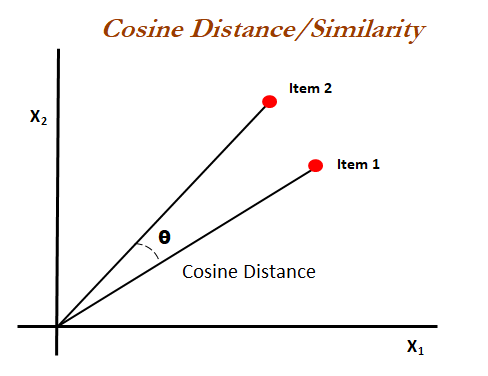

<br></br>
This means we can also perform vector arithmetic with the word vectors. For instance `new_vector = king - man + woman`. This creates nbew vectors (not directly associated with a word) that we can then attempt to find most similar vectors to. `new_vector` closest to vector for **queen**.

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_lg')

If we pass a Unicode string we are able to show the word in a form of a vector. We may see that it have a lot of dimensions, meaning that we have a lot of information contain in this vector version of the word. `doc` and `span` objects themselves also have vectors and these vectors are then deived from the averages of the individual token vectors. It helps to perform not only `word2vec` but also `document2vec`, where document itself is an average of the words.

In [3]:
nlp(u'lion').vector

array([ 1.8963e-01, -4.0309e-01,  3.5350e-01, -4.7907e-01, -4.3311e-01,
        2.3857e-01,  2.6962e-01,  6.4332e-02,  3.0767e-01,  1.3712e+00,
       -3.7582e-01, -2.2713e-01, -3.5657e-01, -2.5355e-01,  1.7543e-02,
        3.3962e-01,  7.4723e-02,  5.1226e-01, -3.9759e-01,  5.1333e-03,
       -3.0929e-01,  4.8911e-02, -1.8610e-01, -4.1702e-01, -8.1639e-01,
       -1.6908e-01, -2.6246e-01, -1.5983e-02,  1.2479e-01, -3.7276e-02,
       -5.7125e-01, -1.6296e-01,  1.2376e-01, -5.5464e-02,  1.3244e-01,
        2.7519e-02,  1.2592e-01, -3.2722e-01, -4.9165e-01, -3.5559e-01,
       -3.0630e-01,  6.1185e-02, -1.6932e-01, -6.2405e-02,  6.5763e-01,
       -2.7925e-01, -3.0450e-03, -2.2400e-02, -2.8015e-01, -2.1975e-01,
       -4.3188e-01,  3.9864e-02, -2.2102e-01, -4.2693e-02,  5.2748e-02,
        2.8726e-01,  1.2315e-01, -2.8662e-02,  7.8294e-02,  4.6754e-01,
       -2.4589e-01, -1.1064e-01,  7.2250e-02, -9.4980e-02, -2.7548e-01,
       -5.4097e-01,  1.2823e-01, -8.2408e-02,  3.1035e-01, -6.33

In this case dimensions remain the same.

In [4]:
nlp(u'the quick brown fox jumped').vector.shape

(300,)

In [5]:
nlp(u'fox').vector.shape

(300,)

The best way to expose vector relationships is through the `.similarity` method of the actual document tokens.

So we can create a variable `tokens`  with three words which are somewhat similar because cat is usually a pet and lion is similar to cat.

In [6]:
tokens = nlp(u'lion cat pet')

The word vector contain enough information to realise that lion and cat do have some similarity. They are above 0.5 similarity. And what's really interesting that cat and pet tend to have a very high similarity because most cats are going to be pets. And it makes a lot of sense that lion and pet have a lot less similarity.

In [8]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.52654374
lion pet 0.39923766
cat lion 0.52654374
cat cat 1.0
cat pet 0.7505456
pet lion 0.39923766
pet cat 0.7505456
pet pet 1.0


Words might have opposite meaning that ofthen appear in the same context may actually have similar vectors as well.

We can tell that "love" and "hate" have different meaning but they are usually used in the same context. For instance, a person either love a movie or hate a movie, love a book or hate a book.

In [9]:
tokens = nlp(u'like love hate')

We may see that "like" and "hate" have almost the same level of similarity as "like" and "hate".

In [10]:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

like like 1.0
like love 0.65790397
like hate 0.6574652
love like 0.65790397
love love 1.0
love hate 0.6393099
hate like 0.6574652
hate love 0.6393099
hate hate 1.0


Sometimes it is helpful to aggregate 300 dimensions into Euclidian L2 norm. It means that we can compute this as the square root of the sum of squared vectors. Adn this is accessable as an attribute of the token called `vector_norm`. And there are other helpful methods including has vecor and is OOV or is out of vocabulary.

Let's take a look at our current vocabulary.

In [11]:
len(nlp.vocab.vectors)

684831

This means that we have 684831 unique words in vocabulary.

In [12]:
nlp.vocab.vectors.shape

(684831, 300)

So we're able to identify if word is out of vocabularty. For exampe in case of someone's proper name.

In [13]:
tokens = nlp(u"dog cat nargle")

`has_vector` checks if there is a vector associated with a word. It is either `True` or `False`.

In [14]:
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
nargle False 0.0 True


Common names can be vectorized.

In [15]:
tokens = nlp(u"dog cat John")

In [16]:
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 7.0336733 False
cat True 6.6808186 False
John True 6.533578 False


We can calculate a new vector by adding and substracting related vectors from these words. And a really famous example is `king - man + woman = queen`.

In order to calculate this we should be able to calculate the cosine similarity itself. To do so, I will use `spatial` from `scipy` library.

In [17]:
from scipy import spatial

cosine_similarity = lambda vec1, vec2: 1 - spatial.distance.cosine(vec1, vec2)

In [18]:
king = nlp.vocab['king'].vector
man = nlp.vocab['man'].vector
woman = nlp.vocab['woman'].vector

What we are aiming with the new vector that it will be similar to something like "queen", "princess" or "highness".

In [19]:
new_vector = king - man + woman

In [20]:
computed_similarities = []

# For all words in the vocab
for word in nlp.vocab:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similrity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word, similrity))

Let's sort this list of tuples. It's going to come in descending order for item with index 1 (which is `similarity`), that is why there is a `-`.  

In [21]:
computed_similarities = sorted(computed_similarities, key=lambda item:-item[1])

Let's print top 10 similar words. What is interesting that we still have "king" as the most similar given the substraction provided for a `new_vector`.

In [22]:
print([t[0].text for t in computed_similarities[:10]])

['king', 'queen', 'prince', 'kings', 'princess', 'royal', 'throne', 'queens', 'monarch', 'kingdom']


___
# VADER Sentiment Analysis with Python and NLTK

By now text classification is been already explored. I was using it to predict sentiment labels on pre-labeled movie reviews. But what if we don't already have those labels? 

VADER (Valence Aware Dictionary for sEntiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is avaliable in the `NLTK` package and can be applied directly to unlabeled text data.

Primarily, VADER sentiment analysis relies on a dictionary which maps lexical features to emotion intensities called sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.

For example, words like "love", "like", "enjoy", "happy" all convey a positive sentiment. VADER is intelligent enough to understand basic context of these words, such as "did not love" as a negative sentiment. It also understands capitalization and punctuation, such as "LOVE!!!".

Sentiment Analysis on raw text is always challenging however, due to a variety of possible factors:
- Positive and Negative sentiment in the same text data.
- Sarcasm using positive words in a negative way.

As for now, `Transformers` are handling this in a lot better way. But the aim for this course is to learn other tools.

In [23]:
import nltk

C:\Users\egora\anaconda3\envs\nlp_course_env\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\egora\AppData\Roaming\nltk_data...


True

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [26]:
sid = SentimentIntensityAnalyzer()

Waht VADER Sentiment Analyzer does is it simply takes the string and returns a dictionary of scores in four categories: negative, neutral, positive and compund score. Which is computed by normalizing the negative, neutral and positive scores.

Let's create a simple string.

In [27]:
a = "This is a good movie"

As we expect, there's not negative value it hase some neutral words or tones in it, and some positive tones. Maximum value for any of these is 1.0.

In [28]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

Now let's try more complicated string.

In [29]:
a = "This was the best, most awesome movie EVER MADE!!!"

So we can see that it is more positive than the previous one. And the compund score is much more positive because neutral also dropped.

In [30]:
sid.polarity_scores(a)

{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'compound': 0.8877}

Let's create a very negative string.

In [31]:
a = "This was the WORST movie that has ever disgraced the screen"

We can see that there's no positive, it's just negative and neutral. And so what happens is the compound score then becomes negative. The compund of 0.0 will be completely neutral, the compound above 0.0 indicates some sort of positive score and below 0.0 indicates negative ones.

In [32]:
sid.polarity_scores(a)

{'neg': 0.465, 'neu': 0.535, 'pos': 0.0, 'compound': -0.8331}

## Amazon reviews analysis

Let's read amazon reviews `.tsv` file.

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('amazonreviews.tsv', sep='\t')

In [36]:
df.head()

,label,review
0,pos,Stuning even for the non-gamer: This sound tra...
1,pos,The best soundtrack ever to anything.: I'm rea...
2,pos,Amazing!: This soundtrack is my favorite music...
3,pos,Excellent Soundtrack: I truly like this soundt...
4,pos,"Remember, Pull Your Jaw Off The Floor After He..."


In [38]:
df.label.value_counts()

neg    5097
pos    4903
Name: label, dtype: int64

Let's do a little bit of cleaning of the data in order to check that we have no empty records. And then I will run the 1st review through VADER.

In [39]:
df.dropna(inplace=True)

In [41]:
blanks = []

for i, lb, rv in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)

In [42]:
blanks

[]

In [44]:
df.iloc[0]['review']

'Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate vid. game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

We can see that it has some level of negativity in it. It might be called by a part "anyone who cares to listen".

In [43]:
sid.polarity_scores(df.iloc[0]['review'])

{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'compound': 0.9454}

Let's add scores and labels to the `DataFrame`.

In [45]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

Now we will have column `scores` that contains this dictionary.

In [46]:
df.head()

,label,review,scores
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co..."
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co..."
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com..."
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com..."
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp..."


Let's add a compound score itself.

In [47]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [48]:
df.head()

,label,review,scores,compound
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781


Let's add here more logic. If `compound` > 0 than the review is positive, and if `compound` < 0 then it is negative. And then we will compare these compound scores to the labels that we already know.

In [49]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

In [50]:
df.head()

,label,review,scores,compound,comp_score
0,pos,Stuning even for the non-gamer: This sound tra...,"{'neg': 0.088, 'neu': 0.669, 'pos': 0.243, 'co...",0.9454,pos
1,pos,The best soundtrack ever to anything.: I'm rea...,"{'neg': 0.018, 'neu': 0.837, 'pos': 0.145, 'co...",0.8957,pos
2,pos,Amazing!: This soundtrack is my favorite music...,"{'neg': 0.04, 'neu': 0.692, 'pos': 0.268, 'com...",0.9858,pos
3,pos,Excellent Soundtrack: I truly like this soundt...,"{'neg': 0.09, 'neu': 0.615, 'pos': 0.295, 'com...",0.9814,pos
4,pos,"Remember, Pull Your Jaw Off The Floor After He...","{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.9781,pos


Let's have an overall report to the accuracy comparing label to the compound score.

In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

If we would've choose randomly whether review is positive or negatvie we would get the score around 0.5. So we can see that it is better than random guessing.

In [52]:
accuracy_score(df['label'], df['comp_score'])

0.7091

It seems like VADER has a little bit of trouble with negative reviews vs positive reviews.

In [53]:
print(classification_report(df['label'], df['comp_score']))

              precision    recall  f1-score   support

         neg       0.86      0.51      0.64      5097
         pos       0.64      0.91      0.75      4903

   micro avg       0.71      0.71      0.71     10000
   macro avg       0.75      0.71      0.70     10000
weighted avg       0.75      0.71      0.70     10000



In [54]:
print(confusion_matrix(df['label'], df['comp_score']))

[[2623 2474]
 [ 435 4468]]


___
## Sentiment Analysis Project

In [55]:
import numpy as np
import pandas as pd

In [56]:
df = pd.read_csv('moviereviews.tsv', sep='\t')

In [57]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


Let's drop everything that is missing.

In [58]:
df.dropna(inplace=True)

Let's check for blanks and remove them.

In [60]:
blanks = []

for i, lb, rv in df.itertuples():
    if type(rv) == str:
        if rv.isspace():
            blanks.append(i)

In [61]:
blanks

[57,
 71,
 147,
 151,
 283,
 307,
 313,
 323,
 343,
 351,
 427,
 501,
 633,
 675,
 815,
 851,
 977,
 1079,
 1299,
 1455,
 1493,
 1525,
 1531,
 1763,
 1851,
 1905,
 1993]

In [62]:
df.drop(blanks, inplace=True)

In [63]:
df.label.value_counts()

pos    969
neg    969
Name: label, dtype: int64

Let's now import sentiment analysis and created the `sid` object.

In [64]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [65]:
sid = SentimentIntensityAnalyzer()

Now I will use `sid` to append a compound score as a column.

In [67]:
df['scores'] = df['review'].apply(lambda review: sid.polarity_scores(review))

In [68]:
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [69]:
df.head()

,label,review,scores,compound
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.067, 'neu': 0.783, 'pos': 0.15, 'com...",0.9953
3,pos,according to hollywood movies made in last few...,"{'neg': 0.069, 'neu': 0.786, 'pos': 0.145, 'co...",0.9972
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.09, 'neu': 0.822, 'pos': 0.088, 'com...",-0.7264


Let's convert this compound value into a label.

In [70]:
df['comp_score'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')

We can see that it matches the first 5 review labels.

In [71]:
df.head()

,label,review,scores,compound,comp_score
0,neg,how do films like mouse hunt get into theatres...,"{'neg': 0.121, 'neu': 0.778, 'pos': 0.101, 'co...",-0.9125,neg
1,neg,some talented actresses are blessed with a dem...,"{'neg': 0.12, 'neu': 0.775, 'pos': 0.105, 'com...",-0.8618,neg
2,pos,this has been an extraordinary year for austra...,"{'neg': 0.067, 'neu': 0.783, 'pos': 0.15, 'com...",0.9953,pos
3,pos,according to hollywood movies made in last few...,"{'neg': 0.069, 'neu': 0.786, 'pos': 0.145, 'co...",0.9972,pos
4,neg,my first press screening of 1998 and already i...,"{'neg': 0.09, 'neu': 0.822, 'pos': 0.088, 'com...",-0.7264,neg


Let's compare that for the entire `DataFrame`.

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

We see that accuracy is not much better than a random guess. This might be caused by the sarcasm in the reviews

In [73]:
accuracy_score(df['label'], df['comp_score'])

0.6367389060887513

In [74]:
print(classification_report(df.label, df.comp_score))

              precision    recall  f1-score   support

         neg       0.72      0.44      0.55       969
         pos       0.60      0.83      0.70       969

   micro avg       0.64      0.64      0.64      1938
   macro avg       0.66      0.64      0.62      1938
weighted avg       0.66      0.64      0.62      1938



In [75]:
print(confusion_matrix(df.label, df.comp_score))

[[427 542]
 [162 807]]
